In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/WCECVillaraEventHistogram/main/Test%20data.csv'
data = pd.read_csv(filepath)

# Create a new DataFrame as a copy of the original
new_data = data.copy()

column_name = "EP_Total_HVAC_Power_W"
if column_name in new_data.columns:
    column_exists = True
    # Apply the condition: If Controller_Water_Heating_Mode is 0, set EP_Total_HVAC_Power_W to 0
    new_data.loc[new_data['Controller_Water_Heating_Mode'] == 0, column_name] = 0
else:
    column_exists = False
    columns = new_data.columns.tolist()

column_exists, columns if not column_exists else "Column found and values updated"

# Save the modified DataFrame to a new CSV file
new_data.to_csv("new_data.csv", index=False)

C:\Users\bober\AppData\Local\Temp\ipykernel_24704\1360123164.py:6: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)


PermissionError: [Errno 13] Permission denied: 'new_data.csv'

C:\Users\bober\AppData\Local\Temp\ipykernel_29432\3422609302.py:6: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)


Event ended at index 100, duration: 15.0
Event ended at index 131, duration: 25.0
Event ended at index 152, duration: 15.0
Event ended at index 247, duration: 15.0
Event ended at index 263, duration: 25.0
Event ended at index 419, duration: 20.0
Event ended at index 478, duration: 15.0
Event ended at index 498, duration: 15.0
Event ended at index 506, duration: 15.0
Event ended at index 518, duration: 5.0
Event ended at index 520, duration: 5.0
Event ended at index 529, duration: 20.0
Event ended at index 645, duration: 20.0
Event ended at index 708, duration: 15.0
Event ended at index 810, duration: 15.0
Event ended at index 847, duration: 5.0
Event ended at index 865, duration: 15.0
Event ended at index 964, duration: 15.0
Event ended at index 1112, duration: 15.0
Event ended at index 1127, duration: 15.0
Event ended at index 1305, duration: 20.0
Event ended at index 1370, duration: 15.0
Event ended at index 1532, duration: 15.0
Event ended at index 1545, duration: 20.0
Event ended a

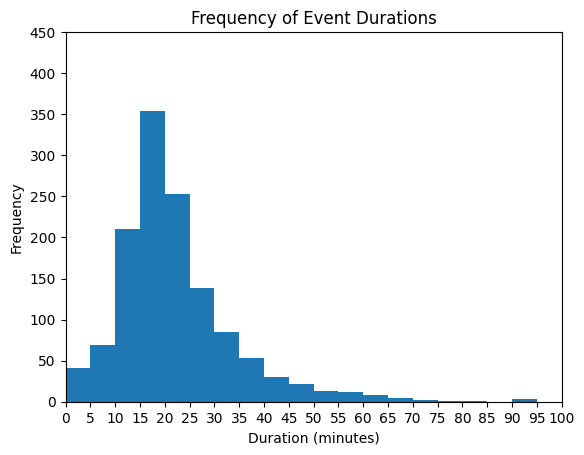

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/WCECVillaraEventHistogram/main/new_data.csv'
data = pd.read_csv(filepath)

# Convert "Date" column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a new DataFrame as a copy of the original
new_data = data.copy()

column_name = "EP_Total_HVAC_Power_W"

new_data['Duration'] = new_data['Date'].shift(-1) - new_data['Date']
new_data['Duration'] = new_data['Duration'].dt.total_seconds().div(60)  # Convert to minutes

# Handle the initial NaN in Duration
new_data['Duration'].fillna(0, inplace=True)

# Initialize variables
duration_sum = 0
event_durations = []
event_on = False  # Flag to track if an event is currently "on"

# Loop through the DataFrame
for i in range(len(new_data)):
    # If the current value of EP_Total_HVAC_Power_W is non-zero
    if new_data.loc[i, column_name] > 0:
        # If an event is not currently "on", start a new event
        if not event_on:
            event_on = True
        # Add to the duration
        duration_sum += new_data.loc[i, 'Duration']
    # If the current value of EP_Total_HVAC_Power_W is zero
    else:
        # If an event is currently "on", end the event and add the duration to the list
        if event_on:
            event_durations.append(duration_sum)
            print(f'Event ended at index {i}, duration: {duration_sum}')  # Debug print
            duration_sum = 0
            event_on = False

# If an event is "on" at the end of the DataFrame, add the duration to the list
if event_on:
    event_durations.append(duration_sum)
    print(f'Event ended at end of DataFrame, duration: {duration_sum}')  # Debug print

# Subtract a small value from the durations
event_durations = [duration - 0.01 for duration in event_durations]

# Create a histogram
plt.hist(event_durations, bins=range(0, int(max(event_durations)) + 5, 5))
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Frequency of Event Durations')

# Set the limits of the x-axis and y-axis
plt.xlim([0, 100])  # Zoom in on the range from 0 to 10 minutes
plt.ylim([0, 450])  # Zoom in on the range from 0 to 10

# Set the locations and labels of the x-ticks
plt.xticks(range(0, 101, 5), labels=range(0, 101, 5))

plt.show()